### Importing

In [1]:
# user configuration

# toggle to create models with/without outliers
remove_outliers_flag = True

# select 1 model for output predictions
#output_model = 'lr'
#output_model = 'ridge'
output_model = 'lasso'

In [2]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet 
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# html
#from IPython.display import Image
#from IPython.core.display import HTML

# other
import datetime as dt
#import re
#import os

In [3]:
# import raw data
input_path = '../data/input/'

df_train = pd.read_csv(input_path + 'train.csv')
df_test = pd.read_csv(input_path + 'test.csv')

# import helper files
mid_path = '../data/mid/'

df_cols = pd.read_csv(mid_path + 'columns.csv')

### Functions

In [4]:
def create_scatterplot(title,data,x,y,hue=None,xlabel=None,ylabel=None):    
        
    plt.figure(figsize=(10,8))
    
    sns.set_style("whitegrid")
    palette = sns.color_palette("bright",n_colors=16)
      
    #sns.regplot(data,x=x,y=y)        
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette=palette)

    #plt.xlim(min_x,max_x)
    #plt.ylim(min_x,max_x)
                    
    plt.title(title)
    
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [5]:
def create_boxplot(data,x,y,title=''):
    
    plt.figure(figsize=(20,12))
    
    b = sns.boxplot(data=data,x=x,y=y)
    b.axes.set_title(title,fontsize=25)
    b.set_xlabel(x,fontsize=20)
    b.set_ylabel(y,fontsize=20)
    b.tick_params(labelsize=15)

In [6]:
def create_lm_model(df,cols,cv=5):
    
    # create X (feature matrix) and y (target)
    X = df.loc[:,cols]
    X = X.values
    y = df['sale_price']
    
    # using holdout method
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=3050)
    
    model = lr.fit(X_train,y_train)
    print('coef: {} intercept: {}'.format(model.coef_,model.intercept_))

    score = model.score(X_test,y_test)
    print('score:',score)

    cvs = cross_val_score(model,X,y,cv=cv)    
    mean = np.mean(cvs)
    print('cvs:',mean,cvs)
    
    return model

### Inspect df_train

In [7]:
print(df_train.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [9]:
df_train_info = df_train.describe()
df_train_info

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
# Check for nulls in columns
null_cols = df_train.isnull().sum()
mask_null = null_cols > 0
null_cols[mask_null].sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [11]:
# Check for nulls in rows
null_rows = df_train.isnull().sum(axis=1)
mask_null = null_rows > 0
null_rows[mask_null].sort_values(ascending=False)

114     16
580     15
437     15
1327    15
2010    15
1594    15
1428    15
1098    14
700     14
256     14
276     12
1007    11
1049    11
737     11
514     11
1211    11
616     11
1372    11
334     11
1125    11
1464    10
1686    10
964     10
954     10
942     10
924     10
901     10
878     10
824     10
1799    10
        ..
1961     3
1844     3
1471     3
159      3
1989     2
761      2
657      2
1225     2
1246     2
149      2
424      2
1134     2
1635     2
29       2
1422     2
1679     2
1707     2
1373     2
1002     2
2032     2
107      2
1652     2
1130     2
110      2
1133     2
1405     2
1756     2
1759     2
52       1
974      1
Length: 2051, dtype: int64

In [12]:
df_train_info = df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [13]:
# find columns with the most empty cells
df_train.count(axis=0).sort_values()

Pool QC               9
Misc Feature         65
Alley               140
Fence               400
Fireplace Qu       1051
Lot Frontage       1721
Garage Finish      1937
Garage Qual        1937
Garage Cond        1937
Garage Yr Blt      1937
Garage Type        1938
Bsmt Exposure      1993
BsmtFin Type 2     1995
Bsmt Qual          1996
BsmtFin Type 1     1996
Bsmt Cond          1996
Mas Vnr Type       2029
Mas Vnr Area       2029
Bsmt Full Bath     2049
Bsmt Half Bath     2049
BsmtFin SF 1       2050
Garage Area        2050
BsmtFin SF 2       2050
Bsmt Unf SF        2050
Total Bsmt SF      2050
Garage Cars        2050
Bedroom AbvGr      2051
Half Bath          2051
Full Bath          2051
Kitchen AbvGr      2051
                   ... 
Lot Area           2051
Street             2051
Lot Shape          2051
Land Contour       2051
Utilities          2051
Lot Config         2051
Land Slope         2051
Neighborhood       2051
Condition 1        2051
Condition 2        2051
Bldg Type       

### Clean df_train and df_test

In [14]:
# rename columns
df_train.columns = df_cols['new_name']
df_test.columns = df_cols['new_name'][0:-1]

In [15]:
# df_train: option to remove outliers
# df_test: do not remove outliers

if remove_outliers_flag == True:
    
    print('before:',len(df_train))
    
    mask_no_outliers = df_train['grd_total_area'] > 4000
    df_train = df_train[~mask_no_outliers]
    
    print('after:',len(df_train))

before: 2051
after: 2049


In [16]:
# convert all string in cells to lowercase -> prevent duplicates when creating dummies
df_train = df_train.applymap(lambda s:s.lower() if type(s) == str else s)
df_test = df_test.applymap(lambda s:s.lower() if type(s) == str else s)

In [17]:
# fill nan/empty cells with na
cols = ['pool_qual','bsmt_qual','fireplace_score','garage_qual','garage_cond','bsmt_type1_score','bsmt_type2_score']

for col in cols:
    #df_train[col] = df_train[col].str.lower()
    df_train[col] = df_train[col].fillna(value='na')
    
    #df_test[col] = df_test[col].str.lower()
    df_test[col] = df_test[col].fillna(value='na')

In [18]:
# fill nan/empty cells with 0
cols = ['bath_half_bsmt_num','bath_full_bsmt_num','garage_area','garage_car_num','bsmt_total_area',
        'bsmt_unfinish_area','bsmt_type2_area','bsmt_type1_area']

for col in cols:
    df_train[col] = df_train[col].fillna(value='0')
    df_test[col] = df_test[col].fillna(value='0')

In [19]:
df_train[cols].head()

new_name,bath_half_bsmt_num,bath_full_bsmt_num,garage_area,garage_car_num,bsmt_total_area,bsmt_unfinish_area,bsmt_type2_area,bsmt_type1_area
0,0,0,475,2,725,192,0,533
1,0,1,559,2,913,276,0,637
2,0,1,246,1,1057,326,0,731
3,0,0,400,2,384,384,0,0
4,0,0,484,2,676,676,0,0


In [20]:
df_test[cols].head()

new_name,bath_half_bsmt_num,bath_full_bsmt_num,garage_area,garage_car_num,bsmt_total_area,bsmt_unfinish_area,bsmt_type2_area,bsmt_type1_area
0,0,0,440,1,1020,1020,0,0
1,0,0,580,2,1967,1967,0,0
2,0,1,426,2,654,100,0,554
3,0,0,480,2,968,968,0,0
4,0,1,514,2,1394,785,0,609


### Output Clean Data

In [21]:
# output to csv

mid_path = '../data/mid/'

df_train.to_csv(mid_path + 'df_train_clean.csv')
df_test.to_csv(mid_path + 'df_test_clean.csv')

#df_corr.to_csv(mid_path + 'df_corr.csv')

### Prepare Data 

### EDA

In [22]:
# df_train heatmap
#fig, ax = plt.subplots(figsize=(20, 10))
#sns.heatmap(df_train.corr())

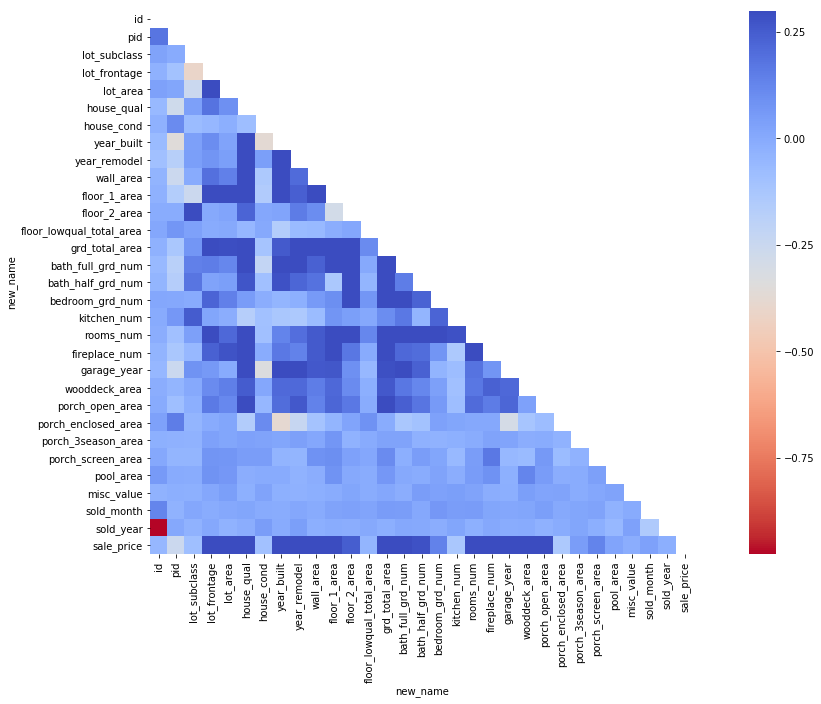

In [23]:
# df_train heatmap (staircase)
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="coolwarm_r")    

#with sns.axes_style("whitegrid"):
    #ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="RdBu")

In [24]:
# inspect correlation matrix
df_corr = df_train.corr()
print(df_corr.shape)
df_corr['sale_price'].sort_values(ascending=False)

(31, 31)


new_name
sale_price                  1.000000
house_qual                  0.803462
grd_total_area              0.719463
floor_1_area                0.648252
year_built                  0.572405
year_remodel                0.550872
bath_full_grd_num           0.538225
garage_year                 0.534514
wall_area                   0.520023
rooms_num                   0.509775
fireplace_num               0.473783
lot_frontage                0.355530
porch_open_area             0.338545
wooddeck_area               0.327629
lot_area                    0.303744
bath_half_grd_num           0.283372
floor_2_area                0.248826
bedroom_grd_num             0.137145
porch_screen_area           0.134555
porch_3season_area          0.048721
sold_month                  0.032508
pool_area                   0.025805
misc_value                 -0.010323
sold_year                  -0.015174
floor_lowqual_total_area   -0.041608
id                         -0.051416
lot_subclass               -0

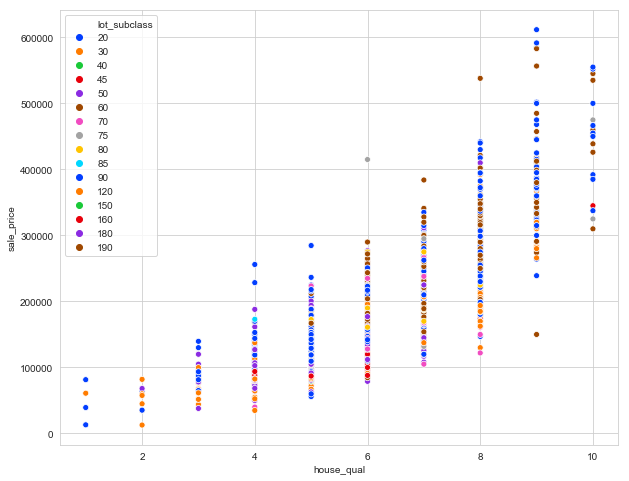

In [25]:
data = df_train
x = 'house_qual'
y = 'sale_price'
hue = 'lot_subclass'

create_scatterplot('',data,x,y,hue) 

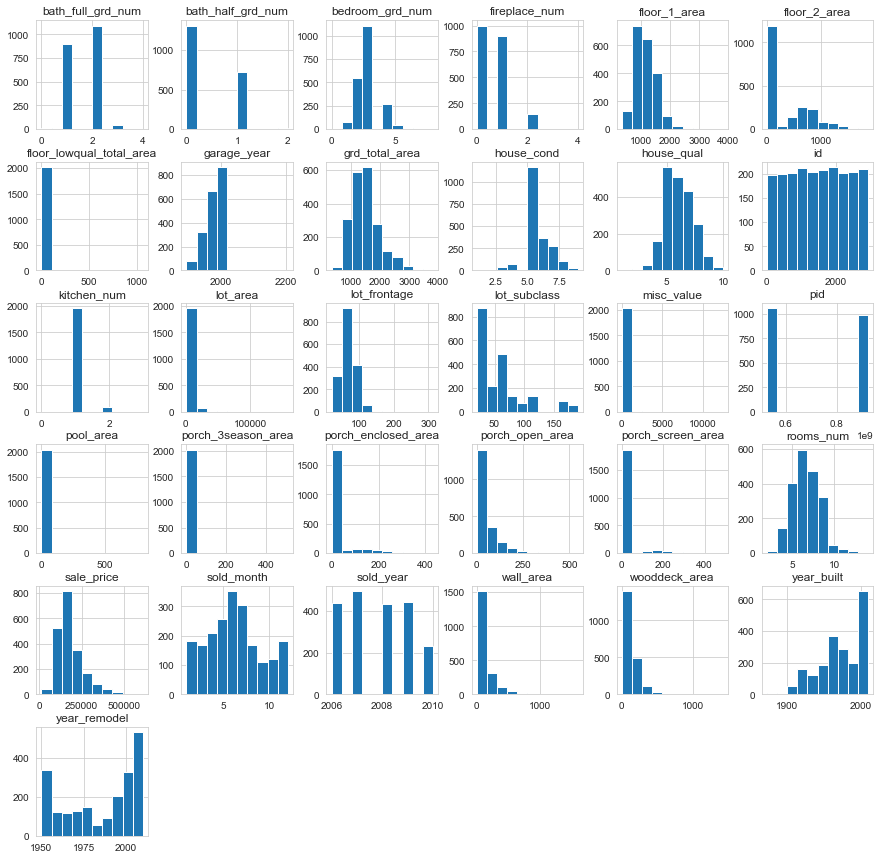

In [29]:
# create histograms for all numeric columns
df_train.hist(figsize=(15, 15));

In [ ]:
data = df_train
x = 'year_built'
y = 'sale_price'

create_scatterplot('',data,x,y)

In [ ]:
data = df_train
x = 'year_remodel'
y = 'sale_price'

create_scatterplot('',data,x,y)

In [ ]:
data = df_train
x = 'grd_total_area'
y = 'sale_price'
hue = 'lot_subclass'

create_scatterplot('',data,x,y,hue)
print('Set remove_outliers_flag==True to show 2 outliers (bottom right)')

In [ ]:
# data = df_train
# x = 'interact_03' # df_train['house_qual'] * df_train['grd_total_area']
# y = 'sale_price'
# hue = 'lot_subclass'

# create_scatterplot('',data,x,y,hue)
# print('less variance compared to above plot')

In [ ]:
create_boxplot(df_train,x='lot_subclass',y='sale_price',title='Sale Price vs Lot Subclass')

print("Most subclasses has sale price between 100K to 200K.")
print("4 subclasses have sale price above 200k and they have more outliers.")
print("I will convert lot_subclass to dummy variables for model predictions.")

In [ ]:
create_boxplot(df_train,x='sale_price',y='lot_zone',title='Sale Price vs Lot Zone')
print('Lot Zone seems to affect Sale Price.')
print('rl (Residential Low Density) and rm (Residential Medium Density) have outliers with high sale prices.')
print("I will convert lot_zone to dummy variables for model predictions.")

In [ ]:
create_boxplot(df_train,x='sale_price',y='neighborhood')
print('Most neighbourhoods have sale price between 100K to 250K')
print('Stone Brook,Northridge Heights,Northridge have highest sale price.')

### Pre-Modelling

In [ ]:
#init models
lr = LinearRegression()
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
lasso = LassoCV(n_alphas=200)

### LR Model

In [ ]:
# lr_model_01
cols = ['house_qual']
lr_model_01 = create_lm_model(df_train,cols,cv=5)

In [ ]:
# lr_model_02
cols = ['grd_total_area']
lr_model_02 = create_lm_model(df_train,cols,cv=5)

In [ ]:
# lr_model_03
cols = ['year_built']
lr_model_03 = create_lm_model(df_train,cols,cv=5)

In [ ]:
# lr_model_04
cols = ['year_remodel']
lr_model_04 = create_lm_model(df_train,cols,cv=5)

In [ ]:
# lr_model_05
cols = ['year_built','year_remodel']
lr_model_05 = create_lm_model(df_train,cols,cv=5)

In [ ]:
# lr_model_06
cols = ['house_qual','grd_total_area']
lr_model_06 = create_lm_model(df_train,cols,cv=5)

In [ ]:
# lr_model_07
cols = ['house_qual','year_remodel']
lr_model_07 = create_lm_model(df_train,cols,cv=5)

In [ ]:
# lr_model_interact_01
df_train['interact_01'] = df_train['year_built'] * df_train['year_remodel']
cols = ['interact_01']
lr_model_interact_01 = create_lm_model(df_train,cols,cv=5)

### Create Feature Matrix and Target

In [ ]:
# scale_cols: scale columns using StandardScaler
# dummy_cols: create dummies for these columns

mask_scale = df_cols['type'] == 'Scale'
mask_dummy = df_cols['type'] == 'Dummy'
mask_feature = df_cols['feature'] == 'Yes'

#scale_cols = df_cols['new_name'][mask_scale]
scale_cols = df_cols['new_name'][mask_scale & mask_feature]

#dummy_cols = df_cols['new_name'][mask_dummy]
dummy_cols = df_cols['new_name'][mask_dummy & mask_feature]

In [ ]:
# dummy_cols: convert numeric columns to string (before get_dummies)
df_train[dummy_cols]= df_train[dummy_cols].astype(str)
df_test[dummy_cols]= df_test[dummy_cols].astype(str)

In [ ]:
# convert selected columns to dummies
df_train_dummy = df_train[dummy_cols]
df_train_dummy = pd.get_dummies(df_train_dummy,drop_first=True)

df_test_dummy = df_test[dummy_cols]
df_test_dummy = pd.get_dummies(df_test_dummy,drop_first=True)

In [ ]:
# dummy columns could be missing in df_train or df_test
# need to add back to ensure the same shape for df_train and df_test

train_cols = set(df_train_dummy.columns)
test_cols = set(df_test_dummy.columns)
diff_cols = list(train_cols.difference(test_cols))

print(diff_cols)
print('before: ',df_train_dummy.shape,df_test_dummy.shape)

for col in diff_cols:
    if col not in train_cols:
        df_train_dummy[col] = 0
    if col not in test_cols:
        df_test_dummy[col] = 0 
        
print('after: ',df_train_dummy.shape,df_test_dummy.shape)

In [ ]:
df_train_scale = df_train[scale_cols]
df_test_scale = df_test[scale_cols]

df_train_2 = pd.concat([df_train_dummy,df_train_scale],axis=1)
df_test_2 = pd.concat([df_test_dummy,df_test_scale],axis=1)

In [ ]:
# create feature matrix (X) and target (Y) from df_train_2

nc = [x for x in df_train_2.columns]              
X = df_train_2[nc].values
Y = df_train[y].values

#pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#pf = pf.fit(X)
#X_poly = pf.transform(X)

#X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, train_size=0.7, test_size=0.3,random_state=3050)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3,random_state=3050)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
# create feature matrix (X2) from df_test_2

nc = [x for x in df_test_2.columns]              
X2 = df_test_2[nc].values

#X_poly_2 = pf.transform(X2)
#X_test_2 = ss.fit_transform(X_poly_2)
X_test_2 = ss.fit_transform(X2)

In [ ]:
# check df_train transformations
print(df_train_dummy.shape)
print(df_train_scale.shape)
print(df_train_2.shape)
print(X.shape)
print(Y.shape)
#print(X_poly.shape)

In [ ]:
# check df_test transformations
print(df_test_dummy.shape)
print(df_test_scale.shape)
print(df_test_2.shape)
print(X2.shape)
#print(X_poly_2.shape)

### LR Model (Polynomial)

### something wrong with scale, dummies, polies for lr model!!!

In [ ]:
# # apply lr_model on X_train and X_test (df_train)
# lr_model = LinearRegression()

# lr_model_poly = lr.fit(X_train,y_train)
# #print('coef: {} intercept: {}'.format(lr_model_poly.coef_,lr_model_poly.intercept_))

# score = lr_model_poly.score(X_test,y_test)
# print('score:',score)

# # perform cross validation on lr_model
# mse = cross_val_score(lr_model_poly,X_poly,Y,cv=5,scoring='neg_mean_squared_error').mean()
# r2 = cross_val_score(lr_model_poly,X_poly,Y,cv=5,scoring='r2').mean()
# print('mse:',mse,'r2',r2)

In [ ]:
# # apply lr_model on X_test_2 (df_test)
# lr_y_pred = lr_model_poly.predict(X_test_2)

### Ridge Model

In [ ]:
# # perform cross validation on ridge_model
# mse = cross_val_score(ridge,X_poly,Y,cv=5,scoring='neg_mean_squared_error').mean()
# ridge_scores = cross_val_score(ridge,X_poly,Y,cv=5)
# r2 = ridge_scores.mean()
# print('mse:',mse,'r2',r2)

In [ ]:
mse = cross_val_score(ridge,X,Y,cv=5,scoring='neg_mean_squared_error').mean()
ridge_scores = cross_val_score(ridge,X,Y,cv=5)
r2 = ridge_scores.mean()
print('mse:',mse,'r2',r2)

In [ ]:
# fit ridge_model
ridge.fit(X_train, y_train)

# score ridge_model
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

# get y_pred from X_test (df_train)
ry_pred = ridge.predict(X_test)
print(r2_score(y_test, ry_pred))

In [ ]:
# get y_pred from X_test_2 (df_test)
ridge_y_pred = ridge.predict(X_test_2)

### Lasso Model

In [ ]:
# # perform cross validation on lasso_model
# mse = cross_val_score(lasso,X_poly,Y,cv=5,scoring='neg_mean_squared_error').mean()
# lasso_scores = cross_val_score(lasso,X_poly,Y,cv=5,scoring='r2')
# r2 = lasso_scores.mean()
# print('mse:',mse,'r2',r2)

In [ ]:
# perform cross validation on lasso_model
mse = cross_val_score(lasso,X,Y,cv=5,scoring='neg_mean_squared_error').mean()
lasso_scores = cross_val_score(lasso,X,Y,cv=5,scoring='r2')
r2 = lasso_scores.mean()
print('mse:',mse,'r2',r2)

In [ ]:
# fit lasso_model
lasso.fit(X_train, y_train)

# score lasso_model
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

In [ ]:
# get y_pred from X_test (df_train)
lasso_y_pred = lasso.predict(X_test)
print(r2_score(y_test, lasso_y_pred))

In [ ]:
# get y_pred from X_test_2 (df_test)
lasso_y_pred = lasso.predict(X_test_2)

### Output Model Predictions

In [ ]:
if output_model == 'lr':
    df_test['SalePrice'] = lr_y_pred
elif output_model == 'ridge':
    df_test['SalePrice'] = ridge_y_pred
elif output_model == 'lasso':
    df_test['SalePrice'] = lasso_y_pred
    
out_cols = ['id','SalePrice']
df_output = df_test[out_cols]
df_output.sort_values(by='id',inplace=True)

In [ ]:
# output to csv

output_path = '../data/output/'

timestamp = dt.datetime.now()
timestamp = timestamp.strftime(" %Y_%m_%d %H_%M_%S ")

df_output.to_csv(output_path + 'submission' + timestamp + output_model + '.csv',index=False)